# Setting up your Machine Learning Application

## Train/Dev/Test Sets
- Traditionally, people would set up a machine learning problem as 60%/20%/20%.
    - In the age of Big Data, it's more and more common to have a even larger training set, e.g. 95%/2.5%/2.5%.
- Mismatched train/test distribution
    - E.g. Training set has cat pictures from webpages, while dev/test sets contains pictures from user uploads.
    - The guidline is to make sure the dev and test sets come from the same distribution.
    - Not having a test set might be okay (only the dev set).

## Bias/Variance

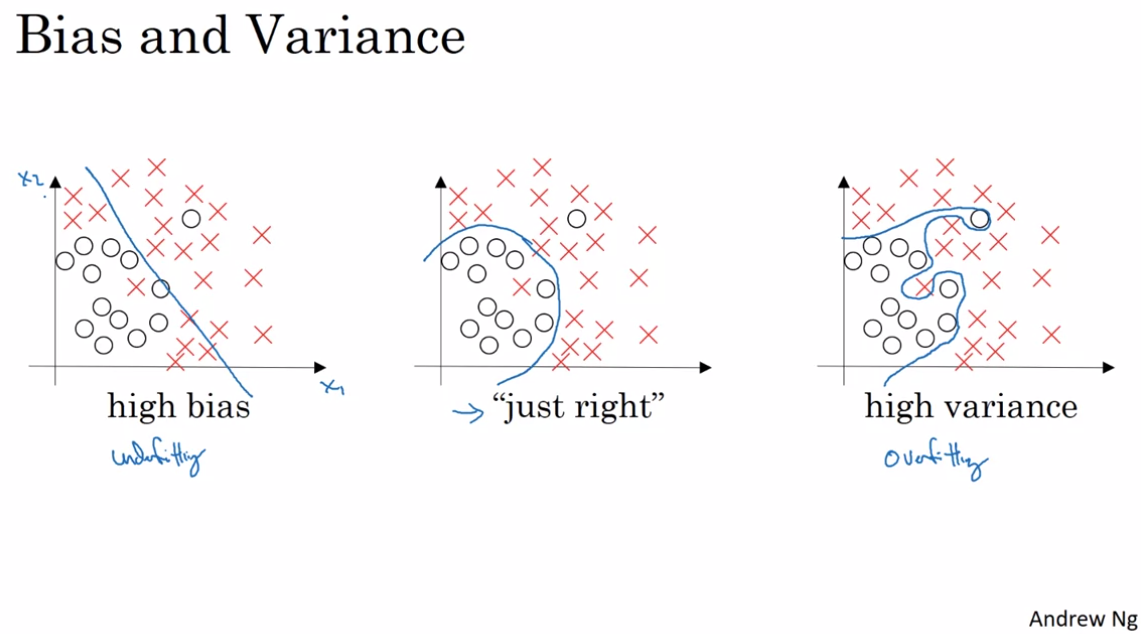

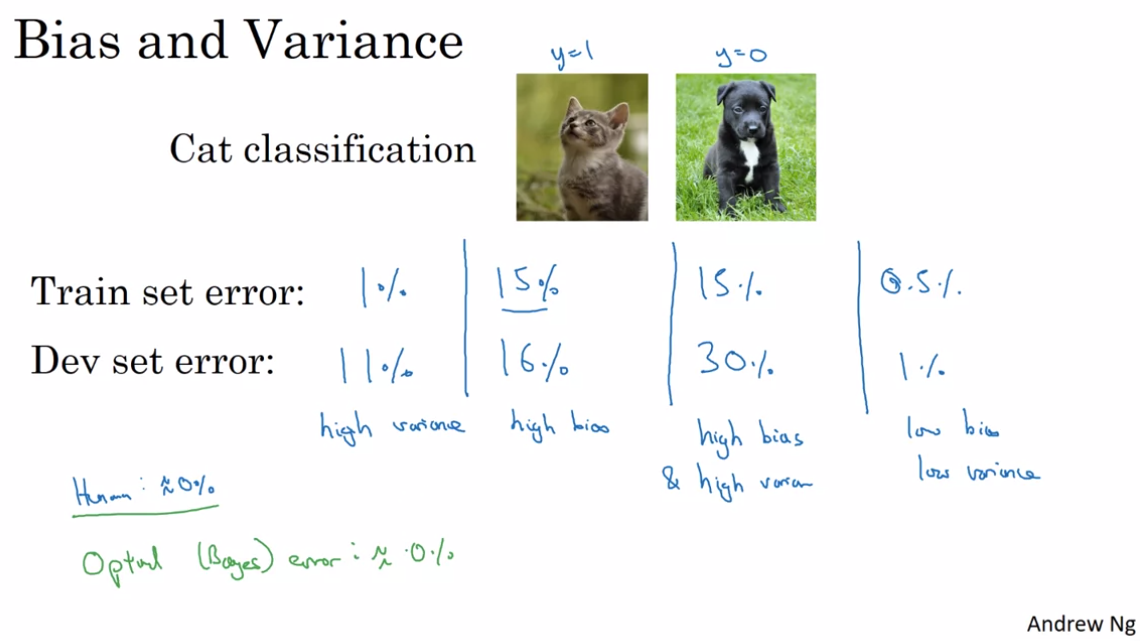

## Basic "Recipe" for Machine Learning
- High Bias (training data performance)?
    - Biggger network
    - Train longer
    - Neural network architecture search
- High Variance (dev data performance)?
    - Mode data
    - Regularization
    - Neural network architecture search
- "Bias-Variance Tradeoff"
    - More a problem in the pre-deep learning era
    - Using deep learning techniques, it is possible to reduce biace/variance only, without hurting the other.

# Regularizing your Neural Network

## Regularization
- Apply Regularization on Logistic Regression
    - We can apply either $l_{1}$ or $l_{2}$ regularization.
    - If apply $l_{1}$ regularization, $w$ will end up being sparse, meaning that there will be a lot of 0s in it. 
    - Note: when writing Python code, use `lambd` to represent $\lambda$, as `lambda` is pre-defined in Python.

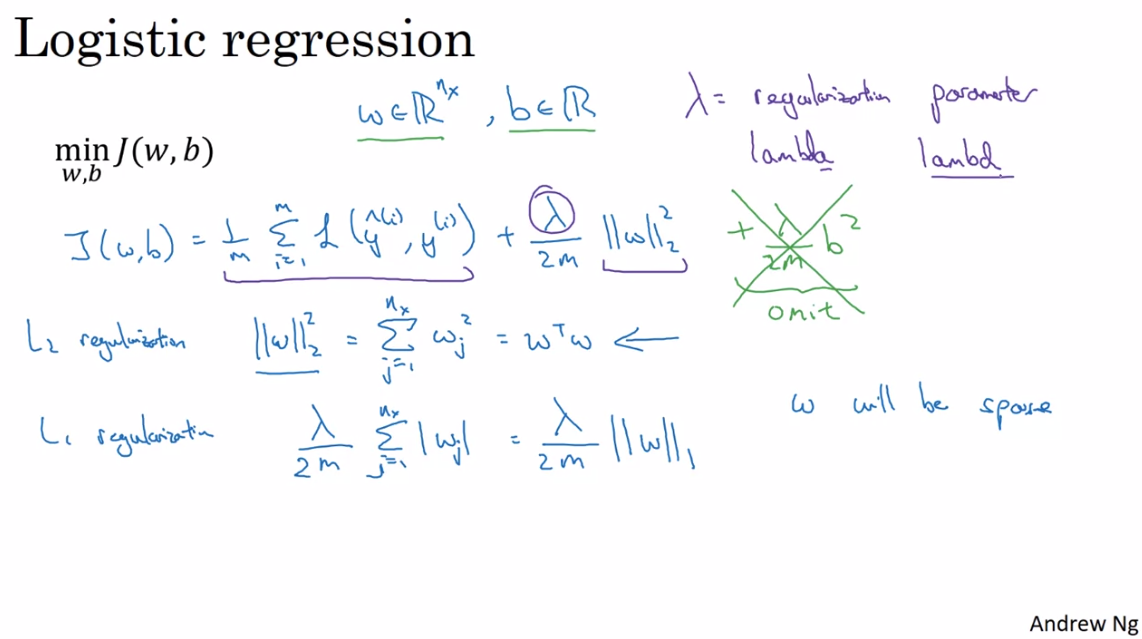

- Apply Regularizations on Neural Networks
    - We add an additional term to the cost function:
        - $J(W^{[1]}, b^{[1]}, ..., W^{[L]}, b^{[L]}) = \frac{1}{m} \sum_{i=1}^{m} l(\hat y^{(i)}, y^{(i)}) + \frac{\lambda}{2m} \sum_{l=1}^{L} \| W^{[l]} \|^{2}_{F}$
            - where $\| W^{[l]} \|^{2}_{F} = \sum_{i=1}^{n^{[l]}} \sum_{j=1}^{n^{[l-1]}} (W_{ij}^{[l]})^{2}$ is called the Frobenius Norm of $W^{[l]}$.
    - For Gradient Descent:
        - $dW^{[l]} = (from \ backprop) + \frac{\lambda}{m} W^{[l]}$
        - $W^{[l]} := W^{[l]} - \alpha dW^{[l]} = (1 - \frac{\alpha \lambda}{m}) W^{[l]} - \alpha (from \ backprop)$
            - This is why $l_{2}$ regularization is sometimes called "Weight Decay".

## Why Regularization Reduces Overfitting
- With $l_{2}$ regularization, the cost function is $J(W^{[1]}, b^{[1]}, ..., W^{[L]}, b^{[L]}) = \frac{1}{m} \sum_{i=1}^{m} l(\hat y^{(i)}, y^{(i)}) + \frac{\lambda}{2m} \sum_{l=1}^{L} \| W^{[l]} \|^{2}_{F}$.
- If we set large $\lambda$, minimizing the cost function will drive $W^{[l]} \approx \bar 0$, meaning that a lot of hidden units will be "turned off".
- Thus, the neural network will be simplified.

## Dropout Regularization

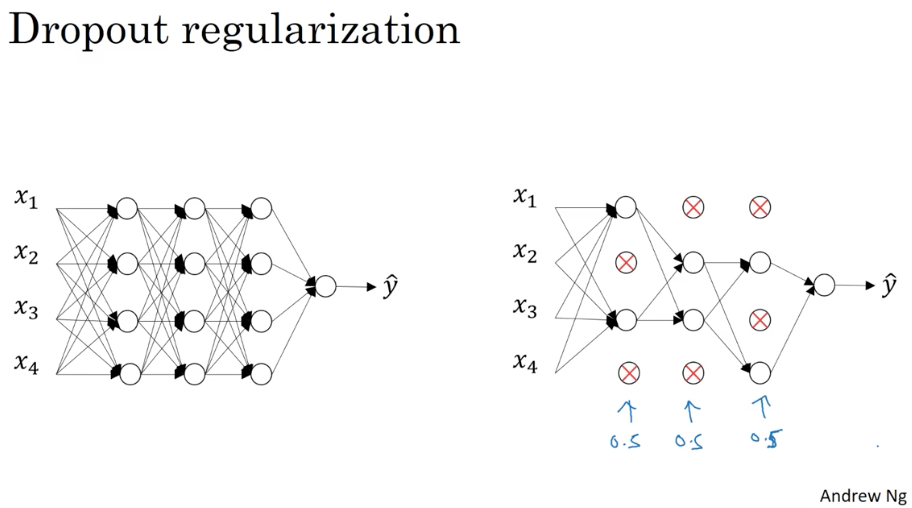

- Implementing Dropout ("Inverted Dropout")
    - Assume $l = 3, keep\_prob = 0.8$
    - `d3 = np.random.rand(a3.shape[0], a3.shape[1]) < keep_prob`
    - `a3 = np.multiply(a3, d3)`
        - $1 - keep\_prob$ units are shut-off
    - `a3 = a3/keep_prob`
        - This step is called the **inverted dropout** technique.
        - But shutting off hidden unit $W^{[3]}_{j}$ will make corresponding activation $a^{[3]}_{j} = 0$. 
        - This steps ensures that the expected value of $a^{[3]}$ remains the same, and thus the expected value of $z^{[4]}$ is not reduced.
            - Recall that $z^{[4]} = W^{[4]} a^{[[3]} + b^{[4]}$
- Making Predictions
    - No dropouts at test time, i.e. use all $W^{[l]}_j$ for predictions.

## Understanding Dropout
- Intuition
    - Because weights in hidden units are randomly shut off by dropout, hidden units in the next layer cannot rely on any one feature from the previous layer.
- Additionally, we can assign different `keep_prob` for different layers.
    - In this way, we can avoid overfitting by a specific large weight matrix $W^{[l]}$ by assigning a specific $d^{[l]}$ for layer $l$.
- Always remember that dropout is a regularization technique, so that don't bother using it if there's no obvious overfitting in your model.
    - One special case is that dropout is more like a default setting for Computer Vision studies, where data is relatively small and overfitting occurs very commonly.
- The downside of using dropout regularization is that the cost function $J$ is no longer well-defined.

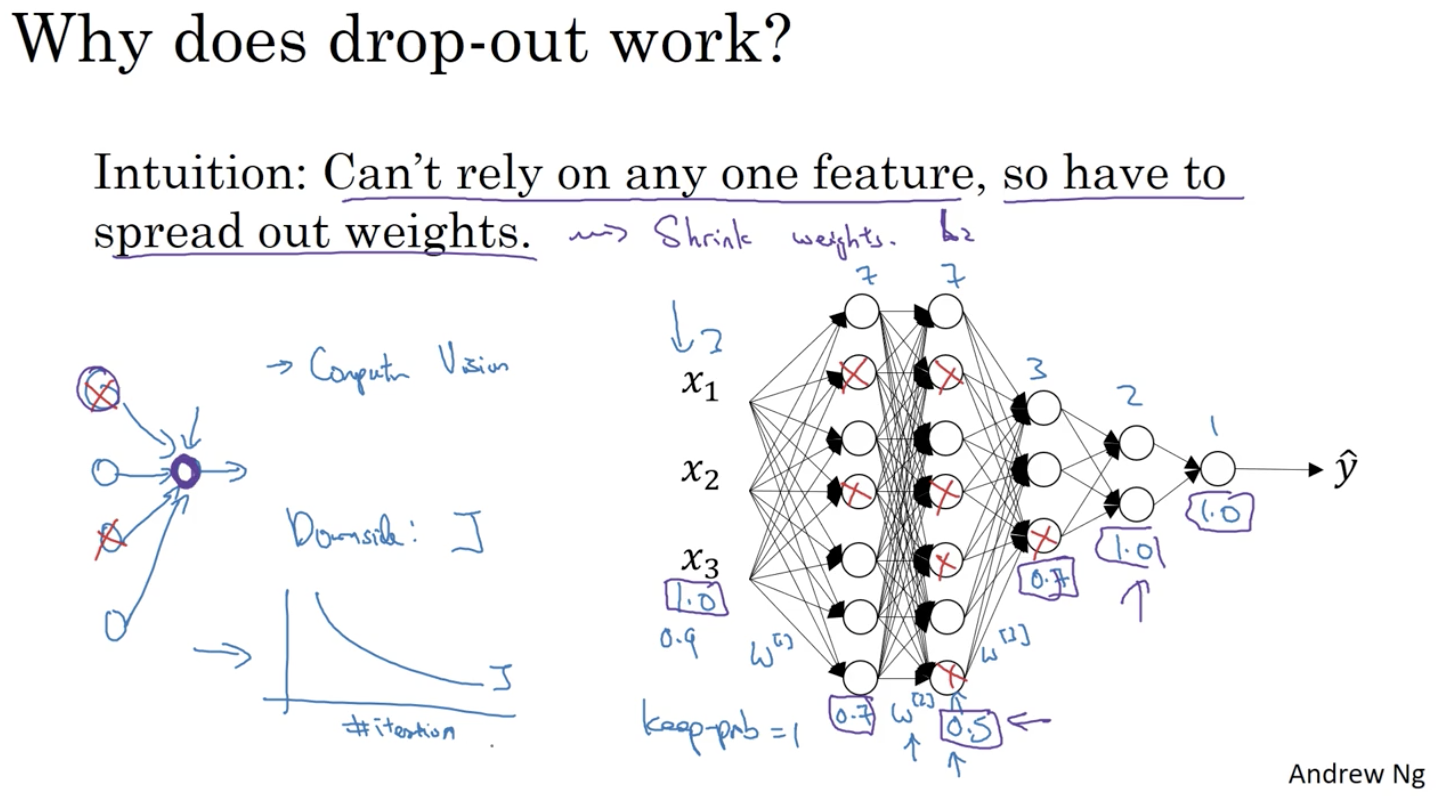

## Other Regularization Methods
- Data Augmentation

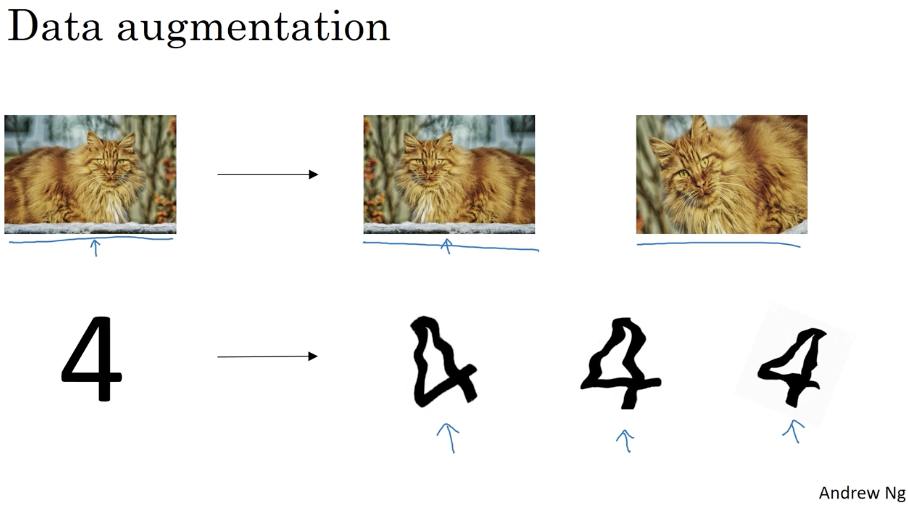

- Early Stopping
    - Stop training the network when dev set error reaches a low point.
    - Downside of early stopping:
        - It brings the following two questions together:
            1. Optimize cost function $J$
            2. Not overfit (using regularization, ...)
        - In machine learning, these two questions should be solved using different tools separately (i.e. Orthogonalization).
        
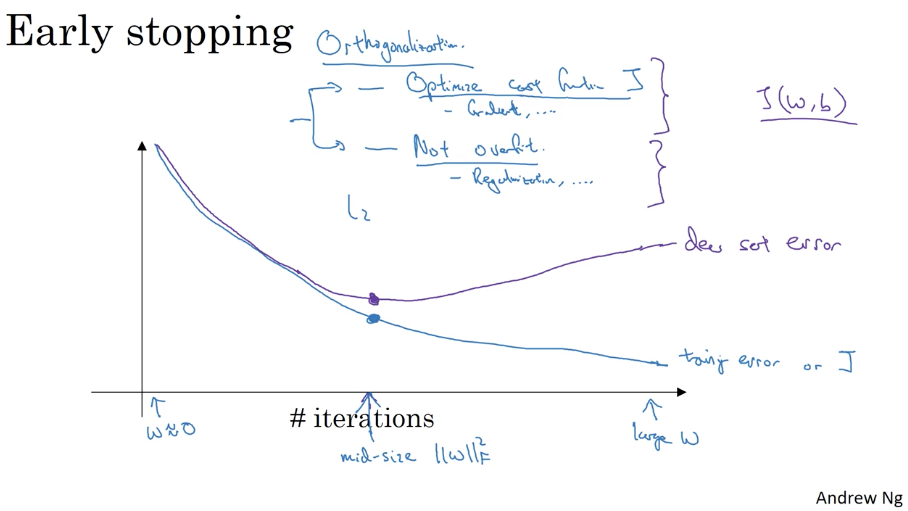

# Setting Up Your Optimization Problem

## Normalizing Inputs
- Normalizing the Training Set
    - $\mu = \frac{1}{m} \sum_{i=1}^{m} X^{(i)}$
    - $\sigma^2 = \frac{1}{m} \sum_{i=1}^{m} (X^{(i)} - \mu)^2$
    - $X := \frac{X - \mu}{\sigma}$
- Note: normalize the test set use the same $\mu$ and $\sigma$.
- Why normalize inputs?
    - With normalized inputs, the cost function $J$ has a more spherical contour and is easier to optimize using Gradient Descent.
    - If using unnormalized inputs, we might have to use very small learning rate with many more iterations to have Gradient Descent to reach the local minimum.
    
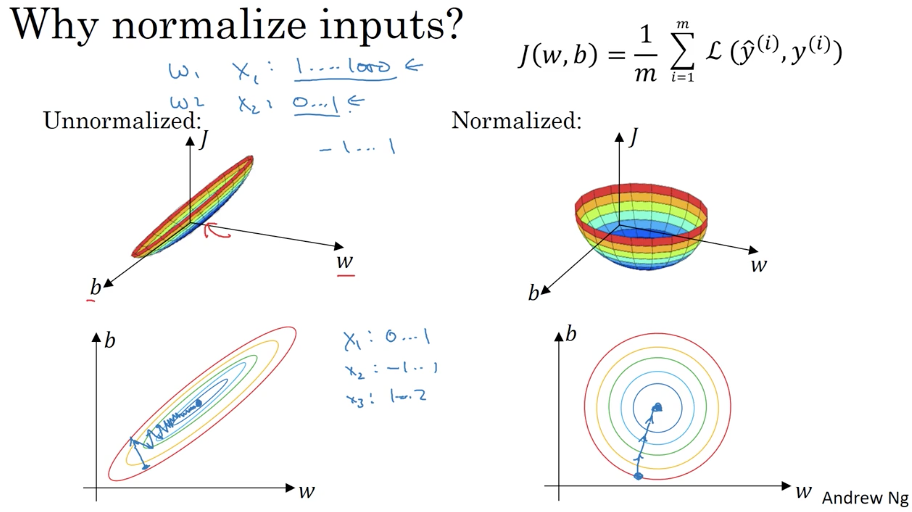

## Vanishing/Exploding Gradients
- Exploding Gradients
    - If each $W^{[l]} > I$ slightly, then in a deep neural network the activations will increase exponentially and explode.
    - One can show that the gradients $dW^{[l]}$ will also increase exponentially with the number of layers $l$. 
- Vanishing Gradients
    - If each $W^{[l]} < I$ slightly, then in a deep neural network the activations will decrease exponentially and vanish.
    - One can show that the gradients $dW^{[l]}$ will also decrease exponentially with the number of layers $l$.
- In either case, Gradient Descent will run very slow and even fail to converge.
    
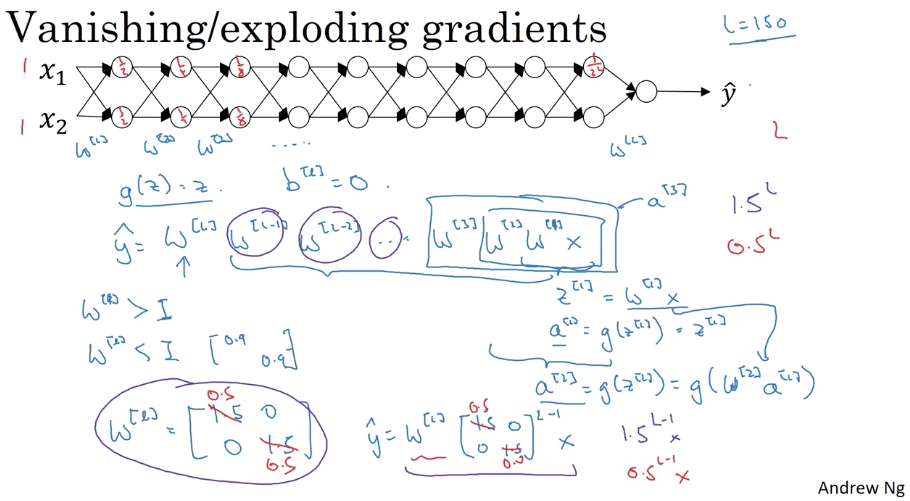

## Weight Intialization for Deep Networks
- Random Initialization is a **partial solution** for the problem of vanishing/exploding gradients.
- Recall that $z = WX + b = w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} + b$
    - To avoid vanishing/exploding gradients, when number of input features $n$ is large, we want $\sum_{i=1}^{n}w_{i}x_{i}$ to be small.
    - We can do this by randomly initializing and rescaling the weights as $\bar w_{i} = 0$ and $Var(w_{i}) = \frac{c}{n}$, so that the weights are not too much bigger than or smaller than 1.
    - For implementation: `W_l = np.random.randn(n_l, n_l_1) * np.sqrt(c/n_l_1)`
- Some common initializations:
    - ReLU
        - `W_l = np.random.randn(n_l, n_l_1) * np.sqrt(2/n_l_1)`
        - He initialization
    - tanh
        - `W_l = np.random.randn(n_l, n_l_1) * np.sqrt(1/n_l_1)`
        - Xavier initialization
    - tanh
        - `W_l = np.random.randn(n_l, n_l_1) * np.sqrt(2/(n_l + n_l_1))`

## Numerical Approximation of Gradients
- The main takeaway is that the two-sided difference formula is much more accurate.
    - $f'(\theta) = \lim_{\epsilon \to 0} \frac{f(\theta + \epsilon) - f(\theta - \epsilon)}{2 \epsilon}$
    

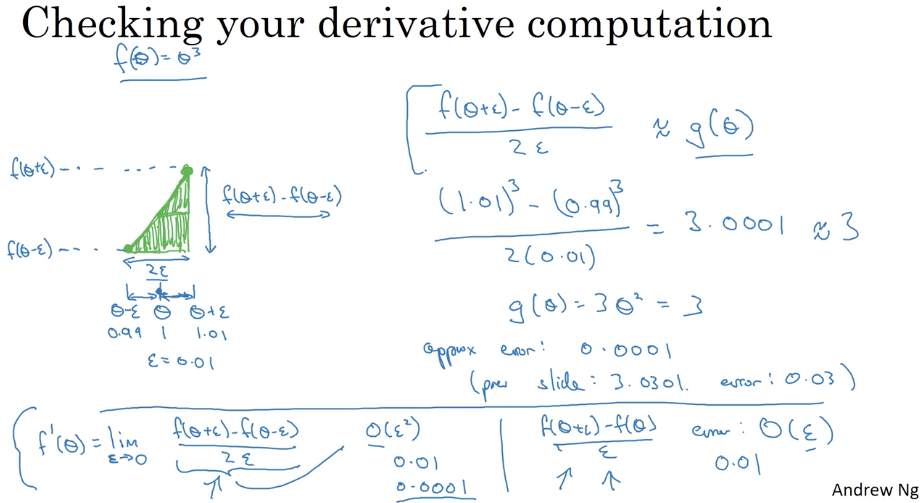

## Gradient Checking
- Gradient Checking for a Neural Network
    - Take $W^{[1]}, b^{[1]}, ..., W^{[L]}, b^{[L]}$ and reshape into a big vector $\theta$.
    - Take $dW^{[1]}, db^{[1]}, ..., dW^{[L]}, db^{[L]}$ and reshape into a big vector $d \theta$.
        - Now, we can express the cost function $J(W^{[1]}, b^{[1]}, ..., W^{[L]}, b^{[L]})$ as $J(\theta)$.
        - The question now would be - "Is $d \theta$ the gradient of $J(\theta)$?"
    - The main step for gradient checking:
    
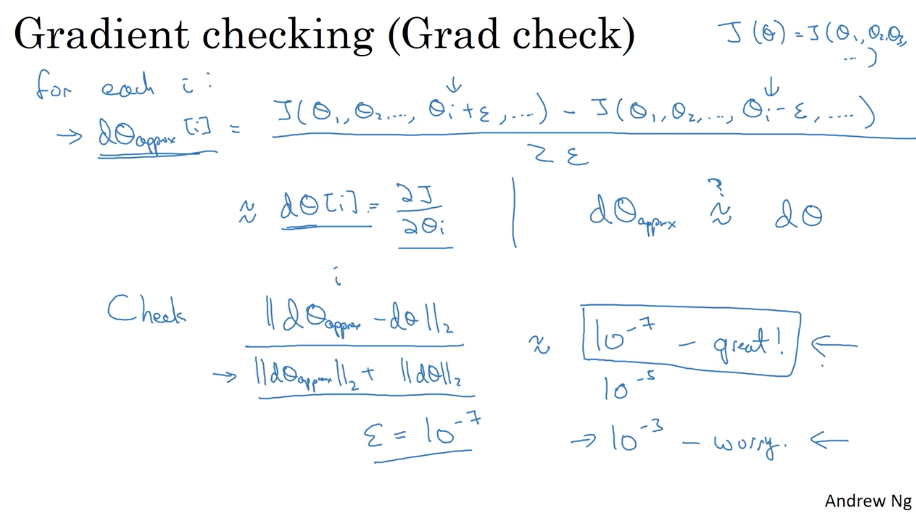

## Gradient Checking Implementation Notes
- Don't use in training - only to debug
- If the algorithm fails grad checking, look at components to identify the bug
- Remember the regularization term (if any)
- Note that grad checking doesn't work with dropout
    - Implement grad checking without dropout (i.e. `keep_prob=1.0`)
- Run random initialization (perhaps again after some training)